#Imports

In [ ]:
import numpy as np
import pandas as pd
from google.colab import files
import io
import seaborn as sns
import matplotlib.pyplot as plt

# Classifiers

In [ ]:
from sklearn import metrics
def analysis(y_pred, y_test):
  print("Actual Data")
  print(ytest)
  print()
  print("Predicted Data")
  print(y_pred)
  print('MSE: ')
  print(mean_squared_error(y_test, y_pred))
  print("Accuracy Score: ", metrics.accuracy_score(ytest, y_pred))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
def run_randomForest(X_train, X_test, y_train, y_test):
    clf = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)
    model = clf.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    analysis(y_pred, y_test)
    return model

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
def run_adaBoost(X_train, X_test, y_train, y_test):
    clf = AdaBoostClassifier()
    model = clf.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    analysis(y_pred, y_test)
    return model

# Dataset 1

In [ ]:
uploaded = files.upload()

Saving team_season.txt to team_season.txt
Saving teams.txt to teams.txt


In [ ]:
team_season = pd.read_csv('team_season.txt')
teams = pd.read_csv('teams.txt')

In [ ]:
team_season

,team,year,leag,o_fgm,o_fga,o_ftm,o_fta,o_oreb,o_dreb,o_reb,o_asts,o_pf,o_stl,o_to,o_blk,o_3pm,o_3pa,o_pts,d_fgm,d_fga,d_ftm,d_fta,d_oreb,d_dreb,d_reb,d_asts,d_pf,d_stl,d_to,d_blk,d_3pm,d_3pa,d_pts,pace,won,lost
0,BOS,1946,N,1397,5133,811,1375,0,0,0,470,1202,0,0,0,0,0,3605,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3900,0.000000,22,38
1,CH1,1946,N,1879,6309,939,1550,0,0,0,436,1473,0,0,0,0,0,4697,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4471,0.000000,39,22
2,CL1,1946,N,1674,5699,903,1428,0,0,0,494,1246,0,0,0,0,0,4251,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4308,0.000000,30,30
3,DE1,1946,N,1437,5843,923,1494,0,0,0,482,1351,0,0,0,0,0,3797,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3918,0.000000,20,40
4,NYK,1946,N,1465,5255,951,1438,0,0,0,457,1218,0,0,0,0,0,3881,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3840,0.000000,33,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1182,SAS,2004,N,2923,6450,1535,2120,987,2489,3476,1771,1716,613,1126,543,507,1395,7888,2712,6359,1501,1955,893,2403,3296,1385,1891,594,1246,421,323,881,7248,91.455696,59,23
1183,SEA,2004,N,2882,6498,1683,2131,1041,2311,3352,1487,1943,553,1113,338,666,1824,8113,2932,6382,1591,2124,930,2174,3104,1698,1948,508,1127,390,470,1317,7925,91.244949,52,30
1184,TOR,2004,N,2952,6656,1626,2101,844,2444,3288,1670,1875,621,1087,317,648,1681,8178,3133,6708,1610,2165,991,2720,3711,1814,1795,507,1188,360,435,1222,8311,95.012611,33,49
1185,UTA,2004,N,2828,6301,1719,2272,1047,2243,3290,1826,2189,541,1292,374,250,762,7625,2731,5965,2027,2653,859,2230,3089,1592,2057,646,1213,474,486,1297,7975,91.195145,26,56


In [ ]:
teams

,team,location,name,leag
0,ANA,Anaheim,Amigos,A
1,AND,Anderson,Duffey Packers,N
2,ATL,Atlanta,Hawks,N
3,BA1,Baltimore,Bullets,N
4,BAL,Baltimore,Bullets,N
...,...,...,...,...
91,WA1,Washington,Bullets,N
92,WAC,Washington,Caps,A
93,WAS,Washington,Wizards,N
94,WAT,Waterloo,Hawks,N


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, mean_squared_error
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler
import copy as copy

## Calculating win percentage

In [ ]:
data_with_percentages = team_season[(team_season["year"] >= 1999)]
#data_with_percentages = team_season
data_with_percentages.loc[:,"win_percentage"] = (((data_with_percentages["won"]/(data_with_percentages["won"]+data_with_percentages["lost"]))*100))

data_with_percentages.loc[:,"o_fg_percentage"] = ((data_with_percentages["o_fgm"]/data_with_percentages["o_fga"])*100)
data_with_percentages.loc[:,"o_3p_percentage"] = ((data_with_percentages["o_3pm"]/data_with_percentages["o_3pa"])*100)
                                                                          
data_with_percentages.loc[:,"d_fg_percentage"] = ((data_with_percentages["d_fgm"]/data_with_percentages["d_fga"])*100)
data_with_percentages.loc[:,"d_3p_percentage"] = ((data_with_percentages["d_3pm"]/data_with_percentages["d_3pa"])*100)
data_with_percentages

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


,team,year,leag,o_fgm,o_fga,o_ftm,o_fta,o_oreb,o_dreb,o_reb,o_asts,o_pf,o_stl,o_to,o_blk,o_3pm,o_3pa,o_pts,d_fgm,d_fga,d_ftm,d_fta,d_oreb,d_dreb,d_reb,d_asts,d_pf,d_stl,d_to,d_blk,d_3pm,d_3pa,d_pts,pace,won,lost,win_percentage,o_fg_percentage,o_3p_percentage,d_fg_percentage,d_3p_percentage
1012,ATL,1999,N,3000,6807,1477,1987,1146,2570,3716,1548,1718,500,1266,466,258,814,7735,3211,7060,1381,1796,1052,2474,3526,1886,1830,655,1001,400,373,1015,8176,94.286369,28,54,34.146341,44.072279,31.695332,45.481586,36.748768
1013,BOS,1999,N,3054,6879,1621,2175,1108,2420,3528,1741,2223,794,1259,287,417,1259,8146,2960,6304,1929,2563,857,2534,3391,1798,1928,638,1394,478,359,995,8208,96.433121,35,47,42.682927,44.395988,33.121525,46.954315,36.080402
1014,CHA,1999,N,2935,6533,1863,2458,884,2635,3519,2023,1670,732,1206,480,339,1001,8072,3048,6811,1347,1807,966,2550,3516,1903,2076,604,1297,421,410,1086,7853,95.936806,49,33,59.756098,44.925762,33.866134,44.751138,37.753223
1015,CHI,1999,N,2565,6180,1482,2089,1032,2323,3356,1636,1908,646,1557,383,340,1031,6952,2916,6396,1533,2070,1000,2416,3416,1902,1966,853,1244,461,358,1049,7723,91.714371,17,65,20.731707,41.504854,32.977692,45.590994,34.127741
1016,CLE,1999,N,2977,6734,1653,2205,1010,2499,3510,1940,2219,713,1427,363,343,920,7950,2983,6733,1851,2385,1013,2586,3598,1942,2058,659,1387,501,420,1227,8237,98.378502,32,50,39.024390,44.208494,37.282609,44.304173,34.229829
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1182,SAS,2004,N,2923,6450,1535,2120,987,2489,3476,1771,1716,613,1126,543,507,1395,7888,2712,6359,1501,1955,893,2403,3296,1385,1891,594,1246,421,323,881,7248,91.455696,59,23,71.951220,45.317829,36.344086,42.648215,36.662883
1183,SEA,2004,N,2882,6498,1683,2131,1041,2311,3352,1487,1943,553,1113,338,666,1824,8113,2932,6382,1591,2124,930,2174,3104,1698,1948,508,1127,390,470,1317,7925,91.244949,52,30,63.414634,44.352108,36.513158,45.941711,35.687168
1184,TOR,2004,N,2952,6656,1626,2101,844,2444,3288,1670,1875,621,1087,317,648,1681,8178,3133,6708,1610,2165,991,2720,3711,1814,1795,507,1188,360,435,1222,8311,95.012611,33,49,40.243902,44.350962,38.548483,46.705426,35.597381
1185,UTA,2004,N,2828,6301,1719,2272,1047,2243,3290,1826,2189,541,1292,374,250,762,7625,2731,5965,2027,2653,859,2230,3089,1592,2057,646,1213,474,486,1297,7975,91.195145,26,56,31.707317,44.881765,32.808399,45.783738,37.471087


In [ ]:
data_with_percentages.shape

(175, 41)

In [ ]:
data_with_percentages.iloc[:, -5]

1012    34.146341
1013    42.682927
1014    59.756098
1015    20.731707
1016    39.024390
          ...    
1182    71.951220
1183    63.414634
1184    40.243902
1185    31.707317
1186    54.878049
Name: win_percentage, Length: 175, dtype: float64

In [ ]:
data_with_percentages.iloc[:, 3:41]

,o_fgm,o_fga,o_ftm,o_fta,o_oreb,o_dreb,o_reb,o_asts,o_pf,o_stl,o_to,o_blk,o_3pm,o_3pa,o_pts,d_fgm,d_fga,d_ftm,d_fta,d_oreb,d_dreb,d_reb,d_asts,d_pf,d_stl,d_to,d_blk,d_3pm,d_3pa,d_pts,pace,won,lost,win_percentage,o_fg_percentage,o_3p_percentage,d_fg_percentage,d_3p_percentage
1012,3000,6807,1477,1987,1146,2570,3716,1548,1718,500,1266,466,258,814,7735,3211,7060,1381,1796,1052,2474,3526,1886,1830,655,1001,400,373,1015,8176,94.286369,28,54,34.146341,44.072279,31.695332,45.481586,36.748768
1013,3054,6879,1621,2175,1108,2420,3528,1741,2223,794,1259,287,417,1259,8146,2960,6304,1929,2563,857,2534,3391,1798,1928,638,1394,478,359,995,8208,96.433121,35,47,42.682927,44.395988,33.121525,46.954315,36.080402
1014,2935,6533,1863,2458,884,2635,3519,2023,1670,732,1206,480,339,1001,8072,3048,6811,1347,1807,966,2550,3516,1903,2076,604,1297,421,410,1086,7853,95.936806,49,33,59.756098,44.925762,33.866134,44.751138,37.753223
1015,2565,6180,1482,2089,1032,2323,3356,1636,1908,646,1557,383,340,1031,6952,2916,6396,1533,2070,1000,2416,3416,1902,1966,853,1244,461,358,1049,7723,91.714371,17,65,20.731707,41.504854,32.977692,45.590994,34.127741
1016,2977,6734,1653,2205,1010,2499,3510,1940,2219,713,1427,363,343,920,7950,2983,6733,1851,2385,1013,2586,3598,1942,2058,659,1387,501,420,1227,8237,98.378502,32,50,39.024390,44.208494,37.282609,44.304173,34.229829
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1182,2923,6450,1535,2120,987,2489,3476,1771,1716,613,1126,543,507,1395,7888,2712,6359,1501,1955,893,2403,3296,1385,1891,594,1246,421,323,881,7248,91.455696,59,23,71.951220,45.317829,36.344086,42.648215,36.662883
1183,2882,6498,1683,2131,1041,2311,3352,1487,1943,553,1113,338,666,1824,8113,2932,6382,1591,2124,930,2174,3104,1698,1948,508,1127,390,470,1317,7925,91.244949,52,30,63.414634,44.352108,36.513158,45.941711,35.687168
1184,2952,6656,1626,2101,844,2444,3288,1670,1875,621,1087,317,648,1681,8178,3133,6708,1610,2165,991,2720,3711,1814,1795,507,1188,360,435,1222,8311,95.012611,33,49,40.243902,44.350962,38.548483,46.705426,35.597381
1185,2828,6301,1719,2272,1047,2243,3290,1826,2189,541,1292,374,250,762,7625,2731,5965,2027,2653,859,2230,3089,1592,2057,646,1213,474,486,1297,7975,91.195145,26,56,31.707317,44.881765,32.808399,45.783738,37.471087


## Data Preparation

In [ ]:
train, test = train_test_split(data_with_percentages, test_size = 0.1,random_state = 20)

xtrain = train.iloc[:, 3:41]
xtrain = xtrain.drop(columns=['win_percentage'],axis=1) # for all but last column
ytrain = train.iloc[:, -5].astype(int) # for last column (result label )


xtest = test.iloc[:, 3:41] 
xtest = xtest.drop(["win_percentage"], axis=1)
ytest = test.iloc[:, -5].astype(int) 

print("Training set size: %.0f" % len(xtrain))
print("Testing set size: %.0f" % len(xtest))

Training set size: 157
Testing set size: 18


In [ ]:
xtrain.shape, ytrain.shape

((157, 37), (157,))

## Remove Constant, Quasi Constant and Duplicate Features

In [ ]:
#remove constant and quasi constant features
constant_filter = VarianceThreshold(threshold=0.01)
constant_filter.fit(xtrain)
X_train_filter = constant_filter.transform(xtrain)
X_test_filter = constant_filter.transform(xtest)

In [ ]:
#remove duplicate features
X_train_T = X_train_filter.T
X_test_T = X_test_filter.T

In [ ]:
X_train_T = pd.DataFrame(X_train_T)
X_test_T = pd.DataFrame(X_test_T)

In [ ]:
X_train_T.duplicated().sum()

0

In [ ]:
duplicated_features = X_train_T.duplicated()

In [ ]:
features_to_keep = [not index for index in duplicated_features]

X_train_unique = X_train_T[features_to_keep].T
X_test_unique = X_test_T[features_to_keep].T

In [ ]:
scaler = StandardScaler().fit(X_train_unique)
X_train_unique = scaler.transform(X_train_unique)
X_test_unique = scaler.transform(X_test_unique)

In [ ]:
X_train_unique = pd.DataFrame(X_train_unique)
X_test_unique = pd.DataFrame(X_test_unique)

In [ ]:
X_train_unique.shape

(157, 37)

## Removal of correlated Feature

In [ ]:
corrmat = X_train_unique.corr()

In [ ]:
#find correlated features
def get_correlation(data, threshold):
    corr_col = set()
    corrmat = data.corr()
    for i in range(len(corrmat.columns)):
        for j in range(i):
            if abs(corrmat.iloc[i, j]) > threshold:
                colname = corrmat.columns[i]
                corr_col.add(colname)
    return corr_col

corr_features = get_correlation(X_train_unique, 0.70)
print('correlated features: ', len(set(corr_features)) )

correlated features:  18


In [ ]:
corr_features

{1, 3, 13, 14, 16, 17, 18, 19, 21, 22, 23, 24, 25, 28, 29, 30, 32, 35}

In [ ]:
X_train_uncorr = X_train_unique.drop(labels=corr_features, axis = 1)
X_test_uncorr = X_test_unique.drop(labels = corr_features, axis = 1)

In [ ]:
X_train_uncorr.shape

(157, 19)

In [ ]:
# Original Data
rf_model = run_randomForest(xtrain, xtest, ytrain, ytest)

Actual Data
1059    52
1089    53
1057    31
1162    70
1147    25
1179    75
1172    36
1076    32
1136    54
1063    67
1058    58
1178    52
1125    29
1171    71
1025    63
1046    64
1110    60
1040    35
Name: win_percentage, dtype: int64

Predicted Data
[51 53 21 68 34 74 40 28 54 74 60 51 34 68 62 63 60 36]
MSE: 
17.22222222222222
Accuracy Score:  0.16666666666666666


In [ ]:
#original data with adaBoost
ada_model = run_adaBoost(xtrain, xtest, ytrain, ytest)

Actual Data
1059    52
1089    53
1057    31
1162    70
1147    25
1179    75
1172    36
1076    32
1136    54
1063    67
1058    58
1178    52
1125    29
1171    71
1025    63
1046    64
1110    60
1040    35
Name: win_percentage, dtype: int64

Predicted Data
[51 60 30 60 25 74 51 30 60 60 60 51 30 60 60 60 60 51]
MSE: 
48.55555555555556
Accuracy Score:  0.1111111111111111


## Dimensionaltiy Reduction by PCA

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
X_pca_train = copy.deepcopy(X_train_uncorr)
X_pca_test = copy.deepcopy(X_test_uncorr)

In [ ]:
pca = PCA()
pca.fit_transform(X_pca_train)
pca_variance_ratio = pca.explained_variance_ratio_

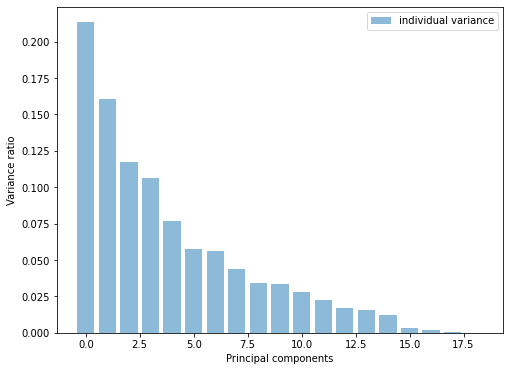

In [ ]:
plt.figure(figsize=(8, 6))
plt.bar(range(19), pca_variance_ratio, alpha=0.5, align='center', label='individual variance')
plt.legend()
plt.ylabel('Variance ratio')
plt.xlabel('Principal components')
plt.show()

[21.34 37.37 49.13 59.73 67.38 73.12 78.74 83.12 86.55 89.88 92.66 94.91
 96.6  98.14 99.37 99.73 99.91 99.99 99.99]


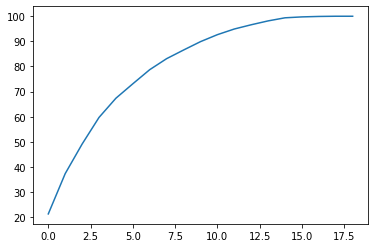

In [ ]:
var = np.cumsum(np.round(pca_variance_ratio, decimals=4)*100)
print(var)
plt.plot(var)

As we can see at least 98% of the data lies in 14 components 

In [ ]:
for component in range(1,19):
    pca = PCA(n_components=component, random_state=42)
    pca.fit(X_pca_train)
    X_train_pca_trans = pca.transform(X_pca_train)
    X_test_pca_trans = pca.transform(X_pca_test)
    print('Selected Components: ', component)
    model = run_randomForest(X_train_pca_trans, X_test_pca_trans, ytrain, ytest)
    print()

Selected Components:  1
Actual Data
1059    52
1089    53
1057    31
1162    70
1147    25
1179    75
1172    36
1076    32
1136    54
1063    67
1058    58
1178    52
1125    29
1171    71
1025    63
1046    64
1110    60
1040    35
Name: win_percentage, dtype: int64

Predicted Data
[59 60 30 60 21 71 41 18 60 34 65 36 32 73 70 62 73 58]
MSE: 
147.0
Accuracy Score:  0.0

Selected Components:  2
Actual Data
1059    52
1089    53
1057    31
1162    70
1147    25
1179    75
1172    36
1076    32
1136    54
1063    67
1058    58
1178    52
1125    29
1171    71
1025    63
1046    64
1110    60
1040    35
Name: win_percentage, dtype: int64

Predicted Data
[35 54 18 68 40 70 41 30 57 45 45 41 25 70 68 50 57 58]
MSE: 
127.83333333333333
Accuracy Score:  0.0

Selected Components:  3
Actual Data
1059    52
1089    53
1057    31
1162    70
1147    25
1179    75
1172    36
1076    32
1136    54
1063    67
1058    58
1178    52
1125    29
1171    71
1025    63
1046    64
1110    60
1040    35
Nam

Based on the results above, the best number of components to use is 12

In [ ]:
pca = PCA(n_components= 12, random_state=42)
pca.fit(X_pca_train)

PCA(copy=True, iterated_power='auto', n_components=12, random_state=42,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
X_train_pca_trans = pca.transform(X_pca_train)
X_test_pca_trans = pca.transform(X_pca_test)
X_train_pca_trans.shape, X_test_pca_trans.shape

((157, 12), (18, 12))

In [ ]:
# PCA applied
pca_model = run_randomForest(X_train_pca_trans, X_test_pca_trans, ytrain, ytest)

Actual Data
1059    52
1089    53
1057    31
1162    70
1147    25
1179    75
1172    36
1076    32
1136    54
1063    67
1058    58
1178    52
1125    29
1171    71
1025    63
1046    64
1110    60
1040    35
Name: win_percentage, dtype: int64

Predicted Data
[54 54 18 60 40 70 45 21 32 60 60 43 34 60 60 68 60 39]
MSE: 
85.05555555555556
Accuracy Score:  0.05555555555555555


In [ ]:
# pca with adaBoost
pca_ada_model = run_adaBoost(X_train_pca_trans, X_test_pca_trans, ytrain, ytest)

Actual Data
1059    52
1089    53
1057    31
1162    70
1147    25
1179    75
1172    36
1076    32
1136    54
1063    67
1058    58
1178    52
1125    29
1171    71
1025    63
1046    64
1110    60
1040    35
Name: win_percentage, dtype: int64

Predicted Data
[51 51 51 51 51 51 51 51 51 31 51 51 51 31 51 51 51 51]
MSE: 
371.8333333333333
Accuracy Score:  0.0


## Dimensionality Reduction by LDA

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [ ]:
for component in range(1,19):
    lda = LDA(n_components=component)
    X_train_lda = lda.fit_transform(X_train_uncorr, ytrain)
    X_test_lda = lda.transform(X_test_uncorr)
    print('Selected Components: ', component)
    model = run_randomForest(X_train_lda, X_test_lda, ytrain, ytest)
    print()

Selected Components:  1
Actual Data
1059    52
1089    53
1057    31
1162    70
1147    25
1179    75
1172    36
1076    32
1136    54
1063    67
1058    58
1178    52
1125    29
1171    71
1025    63
1046    64
1110    60
1040    35
Name: win_percentage, dtype: int64

Predicted Data
[52 53 31 70 25 74 36 32 54 67 58 52 30 71 63 64 60 35]
MSE: 
0.1111111111111111
Accuracy Score:  0.8888888888888888

Selected Components:  2
Actual Data
1059    52
1089    53
1057    31
1162    70
1147    25
1179    75
1172    36
1076    32
1136    54
1063    67
1058    58
1178    52
1125    29
1171    71
1025    63
1046    64
1110    60
1040    35
Name: win_percentage, dtype: int64

Predicted Data
[52 53 31 70 25 74 36 32 54 67 58 52 30 71 63 64 60 35]
MSE: 
0.1111111111111111
Accuracy Score:  0.8888888888888888

Selected Components:  3
Actual Data
1059    52
1089    53
1057    31
1162    70
1147    25
1179    75
1172    36
1076    32
1136    54
1063    67
1058    58
1178    52
1125    29
1171    71
1025

In [ ]:
lda = LDA(n_components=1)
X_train_lda = lda.fit_transform(X_train_uncorr, ytrain)
X_test_lda = lda.transform(X_test_uncorr)

In [ ]:
lda_rf_model = run_randomForest(X_train_lda, X_test_lda, ytrain, ytest)

Actual Data
1059    52
1089    53
1057    31
1162    70
1147    25
1179    75
1172    36
1076    32
1136    54
1063    67
1058    58
1178    52
1125    29
1171    71
1025    63
1046    64
1110    60
1040    35
Name: win_percentage, dtype: int64

Predicted Data
[52 53 31 70 25 74 36 32 54 67 58 52 30 71 63 64 60 35]
MSE: 
0.1111111111111111
Accuracy Score:  0.8888888888888888


In [ ]:
lda_ada_model = run_adaBoost(X_train_lda, X_test_lda, ytrain, ytest)

Actual Data
1059    52
1089    53
1057    31
1162    70
1147    25
1179    75
1172    36
1076    32
1136    54
1063    67
1058    58
1178    52
1125    29
1171    71
1025    63
1046    64
1110    60
1040    35
Name: win_percentage, dtype: int64

Predicted Data
[51 53 34 70 25 74 34 34 53 65 57 51 30 71 60 64 60 34]
MSE: 
2.0555555555555554
Accuracy Score:  0.3333333333333333


## Dimensionality Reduction by ICA

In [ ]:
from sklearn.decomposition import FastICA 

In [ ]:
for component in range(1,19):
    ICA = FastICA(n_components=component, random_state=12, max_iter= 1000) 
    X_train_ica= ICA.fit_transform(X_train_uncorr)
    X_test_ica = ICA.fit_transform(X_test_uncorr)
    print('Selected Components: ', component)
    model = run_randomForest(X_train_ica, X_test_ica, ytrain, ytest)
    print()

Selected Components:  1
Actual Data
1059    52
1089    53
1057    31
1162    70
1147    25
1179    75
1172    36
1076    32
1136    54
1063    67
1058    58
1178    52
1125    29
1171    71
1025    63
1046    64
1110    60
1040    35
Name: win_percentage, dtype: int64

Predicted Data
[34 34 20 62 20 71 34 20 70 20 68 48 20 71 71 73 69 30]
MSE: 
220.66666666666666
Accuracy Score:  0.05555555555555555

Selected Components:  2


/usr/local/lib/python3.6/dist-packages/sklearn/decomposition/_fastica.py:119: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)


Actual Data
1059    52
1089    53
1057    31
1162    70
1147    25
1179    75
1172    36
1076    32
1136    54
1063    67
1058    58
1178    52
1125    29
1171    71
1025    63
1046    64
1110    60
1040    35
Name: win_percentage, dtype: int64

Predicted Data
[54 63 20 71 20 74 40 20 40 46 40 51 20 45 45 70 70 20]
MSE: 
156.44444444444446
Accuracy Score:  0.0

Selected Components:  3


/usr/local/lib/python3.6/dist-packages/sklearn/decomposition/_fastica.py:119: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)


Actual Data
1059    52
1089    53
1057    31
1162    70
1147    25
1179    75
1172    36
1076    32
1136    54
1063    67
1058    58
1178    52
1125    29
1171    71
1025    63
1046    64
1110    60
1040    35
Name: win_percentage, dtype: int64

Predicted Data
[42 15 73 20 45 20 45 74 70 23 60 45 73 20 69 20 20 68]
MSE: 
1251.1666666666667
Accuracy Score:  0.0

Selected Components:  4
Actual Data
1059    52
1089    53
1057    31
1162    70
1147    25
1179    75
1172    36
1076    32
1136    54
1063    67
1058    58
1178    52
1125    29
1171    71
1025    63
1046    64
1110    60
1040    35
Name: win_percentage, dtype: int64

Predicted Data
[68 40 60 20 60 41 45 70 23 51 41 43 60 41 46 20 48 70]
MSE: 
817.4444444444445
Accuracy Score:  0.0



/usr/local/lib/python3.6/dist-packages/sklearn/decomposition/_fastica.py:119: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/decomposition/_fastica.py:119: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)


Selected Components:  5
Actual Data
1059    52
1089    53
1057    31
1162    70
1147    25
1179    75
1172    36
1076    32
1136    54
1063    67
1058    58
1178    52
1125    29
1171    71
1025    63
1046    64
1110    60
1040    35
Name: win_percentage, dtype: int64

Predicted Data
[40 70 64 46 65 42 73 45 20 54 20 57 54 42 21 34 34 60]
MSE: 
808.3333333333334
Accuracy Score:  0.0



/usr/local/lib/python3.6/dist-packages/sklearn/decomposition/_fastica.py:119: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)


Selected Components:  6
Actual Data
1059    52
1089    53
1057    31
1162    70
1147    25
1179    75
1172    36
1076    32
1136    54
1063    67
1058    58
1178    52
1125    29
1171    71
1025    63
1046    64
1110    60
1040    35
Name: win_percentage, dtype: int64

Predicted Data
[47 50 31 51 53 20 43 45 60 60 53 60 51 50 42 42 20 23]
MSE: 
455.0
Accuracy Score:  0.05555555555555555



/usr/local/lib/python3.6/dist-packages/sklearn/decomposition/_fastica.py:119: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/decomposition/_fastica.py:119: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)


Selected Components:  7
Actual Data
1059    52
1089    53
1057    31
1162    70
1147    25
1179    75
1172    36
1076    32
1136    54
1063    67
1058    58
1178    52
1125    29
1171    71
1025    63
1046    64
1110    60
1040    35
Name: win_percentage, dtype: int64

Predicted Data
[74 52 34 45 34 60 18 53 59 50 60 63 54 45 60 40 42 43]
MSE: 
272.3888888888889
Accuracy Score:  0.0



/usr/local/lib/python3.6/dist-packages/sklearn/decomposition/_fastica.py:119: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)


Selected Components:  8
Actual Data
1059    52
1089    53
1057    31
1162    70
1147    25
1179    75
1172    36
1076    32
1136    54
1063    67
1058    58
1178    52
1125    29
1171    71
1025    63
1046    64
1110    60
1040    35
Name: win_percentage, dtype: int64

Predicted Data
[34 52 15 20 59 59 23 81 70 51 18 57 60 40 60 34 60 39]
MSE: 
669.2777777777778
Accuracy Score:  0.05555555555555555



/usr/local/lib/python3.6/dist-packages/sklearn/decomposition/_fastica.py:119: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)


Selected Components:  9
Actual Data
1059    52
1089    53
1057    31
1162    70
1147    25
1179    75
1172    36
1076    32
1136    54
1063    67
1058    58
1178    52
1125    29
1171    71
1025    63
1046    64
1110    60
1040    35
Name: win_percentage, dtype: int64

Predicted Data
[60 28 65 70 50 40 53 34 28 40 20 51 68 51 51 70 60 53]
MSE: 
514.6111111111111
Accuracy Score:  0.1111111111111111



/usr/local/lib/python3.6/dist-packages/sklearn/decomposition/_fastica.py:119: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)


Selected Components:  10
Actual Data
1059    52
1089    53
1057    31
1162    70
1147    25
1179    75
1172    36
1076    32
1136    54
1063    67
1058    58
1178    52
1125    29
1171    71
1025    63
1046    64
1110    60
1040    35
Name: win_percentage, dtype: int64

Predicted Data
[20 39 60 60 51 51 57 48 45 50 60 54 34 51 45 43 51 54]
MSE: 
340.0
Accuracy Score:  0.0



/usr/local/lib/python3.6/dist-packages/sklearn/decomposition/_fastica.py:119: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)


Selected Components:  11
Actual Data
1059    52
1089    53
1057    31
1162    70
1147    25
1179    75
1172    36
1076    32
1136    54
1063    67
1058    58
1178    52
1125    29
1171    71
1025    63
1046    64
1110    60
1040    35
Name: win_percentage, dtype: int64

Predicted Data
[57 64 53 42 51 36 43 59 34 70 43 45 53 53 53 59 51 52]
MSE: 
359.27777777777777
Accuracy Score:  0.0



/usr/local/lib/python3.6/dist-packages/sklearn/decomposition/_fastica.py:119: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)


Selected Components:  12
Actual Data
1059    52
1089    53
1057    31
1162    70
1147    25
1179    75
1172    36
1076    32
1136    54
1063    67
1058    58
1178    52
1125    29
1171    71
1025    63
1046    64
1110    60
1040    35
Name: win_percentage, dtype: int64

Predicted Data
[52 70 42 20 60 50 51 18 63 53 45 70 60 54 54 39 59 34]
MSE: 
439.3888888888889
Accuracy Score:  0.05555555555555555



/usr/local/lib/python3.6/dist-packages/sklearn/decomposition/_fastica.py:119: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)


Selected Components:  13
Actual Data
1059    52
1089    53
1057    31
1162    70
1147    25
1179    75
1172    36
1076    32
1136    54
1063    67
1058    58
1178    52
1125    29
1171    71
1025    63
1046    64
1110    60
1040    35
Name: win_percentage, dtype: int64

Predicted Data
[43 65 51 53 57 48 34 40 53 53 51 57 60 53 60 20 51 51]
MSE: 
365.1666666666667
Accuracy Score:  0.0



/usr/local/lib/python3.6/dist-packages/sklearn/decomposition/_fastica.py:119: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)


Selected Components:  14
Actual Data
1059    52
1089    53
1057    31
1162    70
1147    25
1179    75
1172    36
1076    32
1136    54
1063    67
1058    58
1178    52
1125    29
1171    71
1025    63
1046    64
1110    60
1040    35
Name: win_percentage, dtype: int64

Predicted Data
[68 60 54 40 51 45 50 60 20 51 54 59 57 51 43 59 54 59]
MSE: 
443.77777777777777
Accuracy Score:  0.0



/usr/local/lib/python3.6/dist-packages/sklearn/decomposition/_fastica.py:119: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)


Selected Components:  15
Actual Data
1059    52
1089    53
1057    31
1162    70
1147    25
1179    75
1172    36
1076    32
1136    54
1063    67
1058    58
1178    52
1125    29
1171    71
1025    63
1046    64
1110    60
1040    35
Name: win_percentage, dtype: int64

Predicted Data
[53 53 51 60 51 51 59 59 57 48 51 57 60 60 51 59 51 34]
MSE: 
266.0
Accuracy Score:  0.05555555555555555



/usr/local/lib/python3.6/dist-packages/sklearn/decomposition/_fastica.py:119: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)


Selected Components:  16
Actual Data
1059    52
1089    53
1057    31
1162    70
1147    25
1179    75
1172    36
1076    32
1136    54
1063    67
1058    58
1178    52
1125    29
1171    71
1025    63
1046    64
1110    60
1040    35
Name: win_percentage, dtype: int64

Predicted Data
[57 53 42 51 58 73 51 57 59 28 45 34 51 50 20 60 53 59]
MSE: 
439.1111111111111
Accuracy Score:  0.05555555555555555



/usr/local/lib/python3.6/dist-packages/sklearn/decomposition/_fastica.py:119: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)


Selected Components:  17
Actual Data
1059    52
1089    53
1057    31
1162    70
1147    25
1179    75
1172    36
1076    32
1136    54
1063    67
1058    58
1178    52
1125    29
1171    71
1025    63
1046    64
1110    60
1040    35
Name: win_percentage, dtype: int64

Predicted Data
[53 54 53 54 34 65 53 60 53 65 59 68 53 43 39 48 60 71]
MSE: 
319.22222222222223
Accuracy Score:  0.05555555555555555



/usr/local/lib/python3.6/dist-packages/sklearn/decomposition/_fastica.py:119: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)


Selected Components:  18
Actual Data
1059    52
1089    53
1057    31
1162    70
1147    25
1179    75
1172    36
1076    32
1136    54
1063    67
1058    58
1178    52
1125    29
1171    71
1025    63
1046    64
1110    60
1040    35
Name: win_percentage, dtype: int64

Predicted Data
[54 60 68 59 68 60 68 57 68 51 30 68 68 60 60 59 60 59]
MSE: 
500.55555555555554
Accuracy Score:  0.05555555555555555



As we can see from the results above the best option is using 1 component. Note that using 9 components yields a higher accuracy however the MSE is relatively higher which is why 1 component is the better option. 

In [ ]:
ICA = FastICA(n_components=1, random_state=12, max_iter= 10000) 
X_train_ica= ICA.fit_transform(X_train_uncorr)
X_test_ica = ICA.fit_transform(X_test_uncorr)

In [ ]:
ica_model = run_randomForest(X_train_ica, X_test_ica, ytrain, ytest)

Actual Data
1059    52
1089    53
1057    31
1162    70
1147    25
1179    75
1172    36
1076    32
1136    54
1063    67
1058    58
1178    52
1125    29
1171    71
1025    63
1046    64
1110    60
1040    35
Name: win_percentage, dtype: int64

Predicted Data
[34 34 20 62 20 71 34 20 70 20 68 48 20 71 71 73 69 30]
MSE: 
220.66666666666666
Accuracy Score:  0.05555555555555555


In [ ]:
ica_model = run_adaBoost(X_train_ica, X_test_ica, ytrain, ytest)

Actual Data
1059    52
1089    53
1057    31
1162    70
1147    25
1179    75
1172    36
1076    32
1136    54
1063    67
1058    58
1178    52
1125    29
1171    71
1025    63
1046    64
1110    60
1040    35
Name: win_percentage, dtype: int64

Predicted Data
[51 60 20 60 20 60 51 20 60 20 60 51 20 60 60 60 60 25]
MSE: 
192.61111111111111
Accuracy Score:  0.05555555555555555


# Dataset 2

In [ ]:
uploaded = files.upload()

Saving games.csv to games.csv
Saving teams.csv to teams.csv


In [ ]:
games = pd.read_csv('games.csv')
team_season = pd.read_csv('team_season.txt')
teams_new = pd.read_csv('teams.csv')

In [ ]:
games

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
0,2020-03-01,21900895,Final,1610612766,1610612749,2019,1610612766,85.0,0.354,0.900,0.229,22.0,47.0,1610612749,93.0,0.402,0.762,0.226,20.0,61.0,0
1,2020-03-01,21900896,Final,1610612750,1610612742,2019,1610612750,91.0,0.364,0.400,0.310,19.0,57.0,1610612742,111.0,0.468,0.632,0.275,28.0,56.0,0
2,2020-03-01,21900897,Final,1610612746,1610612755,2019,1610612746,136.0,0.592,0.805,0.542,25.0,37.0,1610612755,130.0,0.505,0.650,0.488,27.0,37.0,1
3,2020-03-01,21900898,Final,1610612743,1610612761,2019,1610612743,133.0,0.566,0.700,0.500,38.0,41.0,1610612761,118.0,0.461,0.897,0.263,24.0,36.0,1
4,2020-03-01,21900899,Final,1610612758,1610612765,2019,1610612758,106.0,0.407,0.885,0.257,18.0,51.0,1610612765,100.0,0.413,0.667,0.429,23.0,42.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23190,2014-10-06,11400007,Final,1610612737,1610612740,2014,1610612737,93.0,0.419,0.821,0.421,24.0,50.0,1610612740,87.0,0.366,0.643,0.375,17.0,43.0,1
23191,2014-10-06,11400004,Final,1610612741,1610612764,2014,1610612741,81.0,0.338,0.719,0.381,18.0,40.0,1610612764,85.0,0.411,0.636,0.267,17.0,47.0,0
23192,2014-10-06,11400005,Final,1610612747,1610612743,2014,1610612747,98.0,0.448,0.682,0.500,29.0,45.0,1610612743,95.0,0.387,0.659,0.500,19.0,43.0,1
23193,2014-10-05,11400002,Final,1610612761,1610612758,2014,1610612761,99.0,0.440,0.771,0.333,21.0,30.0,1610612758,94.0,0.469,0.725,0.385,18.0,45.0,1


In [ ]:
games = games.loc[games['SEASON'] == 2004]

games = games.loc[games["HOME_TEAM_ID"] != 1610612766]
games = games.loc[games["VISITOR_TEAM_ID"] != 1610612766]
games

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
13086,2005-06-23,40400407,Final,1610612759,1610612765,2004,1610612759,81.0,0.426,0.842,0.636,14.0,38.0,1610612765,74.0,0.419,0.714,0.143,17.0,34.0,1
13087,2005-06-21,40400406,Final,1610612759,1610612765,2004,1610612759,86.0,0.413,0.615,0.286,15.0,43.0,1610612765,95.0,0.468,0.684,0.471,19.0,40.0,0
13088,2005-06-19,40400405,Final,1610612765,1610612759,2004,1610612765,95.0,0.440,0.826,0.222,17.0,42.0,1610612759,96.0,0.463,0.571,0.400,20.0,45.0,0
13089,2005-06-16,40400404,Final,1610612765,1610612759,2004,1610612765,102.0,0.456,0.783,0.222,23.0,47.0,1610612759,71.0,0.371,0.583,0.333,15.0,44.0,1
13090,2005-06-14,40400403,Final,1610612765,1610612759,2004,1610612765,96.0,0.471,0.765,0.214,22.0,44.0,1610612759,79.0,0.433,0.650,0.471,16.0,37.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14442,2004-10-22,10400070,Final,1610612737,1610612748,2004,1610612737,82.0,0.403,0.657,0.111,20.0,36.0,1610612748,113.0,0.582,0.652,0.357,16.0,43.0,0
14443,2004-10-22,10400071,Final,1610612765,1610612764,2004,1610612765,100.0,0.549,0.810,0.500,24.0,34.0,1610612764,82.0,0.411,0.724,0.071,15.0,33.0,1
14444,2004-10-22,10400068,Final,1610612738,1610612751,2004,1610612738,83.0,0.431,0.706,0.273,14.0,34.0,1610612751,96.0,0.449,0.885,0.231,21.0,35.0,0
14446,2004-10-22,10400067,Final,1610612762,1610612758,2004,1610612762,103.0,0.507,0.641,0.667,25.0,43.0,1610612758,88.0,0.362,0.814,0.250,16.0,33.0,1


In [ ]:
team_season

,team,year,leag,o_fgm,o_fga,o_ftm,o_fta,o_oreb,o_dreb,o_reb,o_asts,o_pf,o_stl,o_to,o_blk,o_3pm,o_3pa,o_pts,d_fgm,d_fga,d_ftm,d_fta,d_oreb,d_dreb,d_reb,d_asts,d_pf,d_stl,d_to,d_blk,d_3pm,d_3pa,d_pts,pace,won,lost
0,BOS,1946,N,1397,5133,811,1375,0,0,0,470,1202,0,0,0,0,0,3605,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3900,0.000000,22,38
1,CH1,1946,N,1879,6309,939,1550,0,0,0,436,1473,0,0,0,0,0,4697,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4471,0.000000,39,22
2,CL1,1946,N,1674,5699,903,1428,0,0,0,494,1246,0,0,0,0,0,4251,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4308,0.000000,30,30
3,DE1,1946,N,1437,5843,923,1494,0,0,0,482,1351,0,0,0,0,0,3797,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3918,0.000000,20,40
4,NYK,1946,N,1465,5255,951,1438,0,0,0,457,1218,0,0,0,0,0,3881,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3840,0.000000,33,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1182,SAS,2004,N,2923,6450,1535,2120,987,2489,3476,1771,1716,613,1126,543,507,1395,7888,2712,6359,1501,1955,893,2403,3296,1385,1891,594,1246,421,323,881,7248,91.455696,59,23
1183,SEA,2004,N,2882,6498,1683,2131,1041,2311,3352,1487,1943,553,1113,338,666,1824,8113,2932,6382,1591,2124,930,2174,3104,1698,1948,508,1127,390,470,1317,7925,91.244949,52,30
1184,TOR,2004,N,2952,6656,1626,2101,844,2444,3288,1670,1875,621,1087,317,648,1681,8178,3133,6708,1610,2165,991,2720,3711,1814,1795,507,1188,360,435,1222,8311,95.012611,33,49
1185,UTA,2004,N,2828,6301,1719,2272,1047,2243,3290,1826,2189,541,1292,374,250,762,7625,2731,5965,2027,2653,859,2230,3089,1592,2057,646,1213,474,486,1297,7975,91.195145,26,56


In [ ]:
team_season = team_season.loc[team_season['year'] == 2004]
team_season = team_season.drop(columns= ['leag'], axis=1)

In [ ]:
team_season

,team,year,o_fgm,o_fga,o_ftm,o_fta,o_oreb,o_dreb,o_reb,o_asts,o_pf,o_stl,o_to,o_blk,o_3pm,o_3pa,o_pts,d_fgm,d_fga,d_ftm,d_fta,d_oreb,d_dreb,d_reb,d_asts,d_pf,d_stl,d_to,d_blk,d_3pm,d_3pa,d_pts,pace,won,lost
1157,ATL,2004,2942,6672,1417,1994,1100,2335,3435,1614,2009,629,1319,344,304,973,7605,3044,6389,1846,2396,902,2483,3385,1803,1777,716,1235,484,467,1232,8401,93.948730,13,69
1158,BOS,2004,3046,6511,1775,2323,909,2438,3347,1810,2000,667,1297,423,437,1252,8304,2960,6664,1825,2423,1039,2427,3466,1859,1937,714,1248,402,488,1370,8233,95.735855,45,37
1159,CHI,2004,2849,6592,1536,2048,1001,2591,3592,1743,2028,576,1371,369,511,1433,7745,2763,6548,1716,2305,979,2524,3503,1715,1914,685,1272,434,416,1245,7658,96.283737,47,35
1160,CHR,2004,2961,6859,1487,2096,1083,2335,3418,1794,1893,695,1192,440,320,881,7729,3015,6507,1748,2279,959,2586,3545,1768,1857,624,1304,446,442,1224,8220,96.201630,18,64
1161,CLE,2004,2990,6687,1634,2174,1117,2352,3469,1851,1850,654,1141,461,300,904,7914,2913,6444,1601,2135,938,2324,3262,1737,1770,549,1226,419,422,1122,7849,93.840187,42,40
1162,DAL,2004,3058,6691,1826,2314,990,2530,3520,1610,1827,708,1102,461,463,1273,8405,2941,6712,1601,2123,1072,2467,3539,1714,1898,584,1258,399,451,1366,7934,95.204948,58,24
1163,DEN,2004,3038,6615,1765,2313,967,2473,3440,1958,1878,750,1224,489,320,940,8161,2950,6606,1632,2189,975,2441,3416,1778,1960,636,1325,458,463,1342,7995,96.029640,49,33
1164,DET,2004,2851,6421,1588,2150,1054,2507,3561,1787,1638,576,1133,497,363,1053,7653,2791,6496,1344,1790,928,2321,3249,1618,1851,610,1138,367,410,1213,7336,89.839737,54,28
1165,GSW,2004,3029,7039,1412,1955,1069,2436,3505,1811,1833,642,1112,420,624,1774,8094,3133,6838,1555,2087,1057,2771,3828,1858,1782,570,1231,417,450,1240,8271,95.689407,34,48
1166,HOU,2004,2846,6419,1551,1986,874,2601,3475,1733,1806,563,1135,378,553,1521,7796,2720,6423,1571,2116,892,2444,3336,1696,1773,607,1091,335,454,1343,7465,91.303230,51,31


In [ ]:
col_list =["HOME_TEAM_ID","VISITOR_TEAM_ID","SEASON", "HOME_TEAM_WINS"]
game_outcome = games[['HOME_TEAM_ID', 'VISITOR_TEAM_ID','HOME_TEAM_WINS']]
game_outcome = np.array(game_outcome)
game_outcome

array([[1610612759, 1610612765,          1],
       [1610612759, 1610612765,          0],
       [1610612765, 1610612759,          0],
       ...,
       [1610612738, 1610612751,          0],
       [1610612762, 1610612758,          1],
       [1610612750, 1610612752,          1]])

In [ ]:
team_ID = [1610612737, 1610612738, 1610612741, 1610612739, 1610612742, 1610612743, 1610612765, 1610612744, 1610612745, 1610612754, 1610612746, 1610612747, 1610612763, 1610612748, 1610612749, 1610612750, 1610612751, 1610612740, 1610612752, 1610612753, 1610612755, 1610612756, 1610612757, 1610612758, 1610612759, 1610612760, 1610612761, 1610612762, 1610612764]

In [ ]:
len(team_ID)

29

In [ ]:
TS_2003 = np.array(team_season)
team_stats = []
for r in range(len(TS_2003)):
  x = []
  x.append(r)
  for c in range(2,TS_2003.shape[1]):
    x.append(TS_2003[r][c])

  team_stats.append(x)

team_stats

[[0,
  2942,
  6672,
  1417,
  1994,
  1100,
  2335,
  3435,
  1614,
  2009,
  629,
  1319,
  344,
  304,
  973,
  7605,
  3044,
  6389,
  1846,
  2396,
  902,
  2483,
  3385,
  1803,
  1777,
  716,
  1235,
  484,
  467,
  1232,
  8401,
  93.94873,
  13,
  69],
 [1,
  3046,
  6511,
  1775,
  2323,
  909,
  2438,
  3347,
  1810,
  2000,
  667,
  1297,
  423,
  437,
  1252,
  8304,
  2960,
  6664,
  1825,
  2423,
  1039,
  2427,
  3466,
  1859,
  1937,
  714,
  1248,
  402,
  488,
  1370,
  8233,
  95.735855,
  45,
  37],
 [2,
  2849,
  6592,
  1536,
  2048,
  1001,
  2591,
  3592,
  1743,
  2028,
  576,
  1371,
  369,
  511,
  1433,
  7745,
  2763,
  6548,
  1716,
  2305,
  979,
  2524,
  3503,
  1715,
  1914,
  685,
  1272,
  434,
  416,
  1245,
  7658,
  96.283737,
  47,
  35],
 [3,
  2961,
  6859,
  1487,
  2096,
  1083,
  2335,
  3418,
  1794,
  1893,
  695,
  1192,
  440,
  320,
  881,
  7729,
  3015,
  6507,
  1748,
  2279,
  959,
  2586,
  3545,
  1768,
  1857,
  624,
  1304,
  4

In [ ]:
len(team_stats[0])

34

## Feature Vector

In [ ]:
data = []
for i in range(len(game_outcome)):
  # results hold 0 or 1 if home team won or lost 
  result = []
  result.append(game_outcome[i][2])
  
  # get home_team stats
  find_index = np.where(team_ID == game_outcome[i][0])
  index = find_index[0][0]
  home_side = team_stats[index]
 
  # get away_team stats
  find_index = np.where(team_ID == game_outcome[i][1])
  index = find_index[0][0]
  away_side =  team_stats[index]

  # create feature vector home_team stats, away_team stats, outcome of game
  feature_vector = np.concatenate((home_side, away_side,result), axis=None)
  
  # add fearure vector to data
  data.append(feature_vector)


In [ ]:
print(data)

[array([2.4000000e+01, 3.2030000e+03, 6.9780000e+03, 1.5770000e+03,
       2.0040000e+03, 1.0230000e+03, 2.4550000e+03, 3.4780000e+03,
       2.0050000e+03, 1.6840000e+03, 6.7400000e+02, 1.0730000e+03,
       3.1600000e+02, 5.2200000e+02, 1.3960000e+03, 8.5050000e+03,
       3.1860000e+03, 6.9410000e+03, 1.4850000e+03, 2.0110000e+03,
       1.1020000e+03, 2.5320000e+03, 3.6340000e+03, 1.7660000e+03,
       1.7610000e+03, 6.2200000e+02, 1.1960000e+03, 3.6500000e+02,
       4.7100000e+02, 1.3180000e+03, 8.3280000e+03, 9.6841805e+01,
       5.0000000e+01, 3.2000000e+01, 6.0000000e+00, 3.0380000e+03,
       6.6150000e+03, 1.7650000e+03, 2.3130000e+03, 9.6700000e+02,
       2.4730000e+03, 3.4400000e+03, 1.9580000e+03, 1.8780000e+03,
       7.5000000e+02, 1.2240000e+03, 4.8900000e+02, 3.2000000e+02,
       9.4000000e+02, 8.1610000e+03, 2.9500000e+03, 6.6060000e+03,
       1.6320000e+03, 2.1890000e+03, 9.7500000e+02, 2.4410000e+03,
       3.4160000e+03, 1.7780000e+03, 1.9600000e+03, 6.3600000

In [ ]:
len(data[0])

69

In [ ]:
data = np.array(data)

In [ ]:
print(data)

[[2.400e+01 3.203e+03 6.978e+03 ... 4.900e+01 3.300e+01 1.000e+00]
 [2.400e+01 3.203e+03 6.978e+03 ... 4.900e+01 3.300e+01 0.000e+00]
 [6.000e+00 3.038e+03 6.615e+03 ... 5.000e+01 3.200e+01 0.000e+00]
 ...
 [1.000e+00 3.046e+03 6.511e+03 ... 4.400e+01 3.800e+01 0.000e+00]
 [2.700e+01 2.952e+03 6.656e+03 ... 2.700e+01 5.500e+01 1.000e+00]
 [1.500e+01 2.964e+03 6.580e+03 ... 1.800e+01 6.400e+01 1.000e+00]]


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [ ]:
train, test = train_test_split( data, test_size = 0.1,random_state = 20)

xtrain = train[:, :-1] # for all but last column
ytrain = train[:, -1] # for last column (result label )

xtest = test[:, :-1] 
ytest = test[:, -1] 

print("Training set size: %.0f" % len(xtrain))
print("Testing set size: %.0f" % len(xtest))

Training set size: 1149
Testing set size: 128


## Remove Constant, Quasi Constant and Duplicate Features

In [ ]:
#remove constant and quasi constant features
constant_filter = VarianceThreshold(threshold=0.01)
constant_filter.fit(xtrain)
X_train_filter = constant_filter.transform(xtrain)
X_test_filter = constant_filter.transform(xtest)

In [ ]:
#remove duplicate features
X_train_T = X_train_filter.T
X_test_T = X_test_filter.T

In [ ]:
X_train_T = pd.DataFrame(X_train_T)
X_test_T = pd.DataFrame(X_test_T)

In [ ]:
X_train_T.duplicated().sum()

0

In [ ]:
duplicated_features = X_train_T.duplicated()

In [ ]:
features_to_keep = [not index for index in duplicated_features]

X_train_unique = X_train_T[features_to_keep].T
X_test_unique = X_test_T[features_to_keep].T

In [ ]:
scaler = StandardScaler().fit(X_train_unique)
X_train_unique = scaler.transform(X_train_unique)
X_test_unique = scaler.transform(X_test_unique)

In [ ]:
X_train_unique = pd.DataFrame(X_train_unique)
X_test_unique = pd.DataFrame(X_test_unique)

In [ ]:
X_train_unique.shape

(1149, 68)

## Removal of correlated Feature

In [ ]:
corrmat = X_train_unique.corr()

In [ ]:
#find correlated features
def get_correlation(data, threshold):
    corr_col = set()
    corrmat = data.corr()
    for i in range(len(corrmat.columns)):
        for j in range(i):
            if abs(corrmat.iloc[i, j]) > threshold:
                colname = corrmat.columns[i]
                corr_col.add(colname)
    return corr_col

corr_features = get_correlation(X_train_unique, 0.70)
print('correlated features: ', len(set(corr_features)) )

correlated features:  37


In [ ]:
X_train_uncorr = X_train_unique.drop(labels=corr_features, axis = 1)
X_test_uncorr = X_test_unique.drop(labels = corr_features, axis = 1)

In [ ]:
X_train_uncorr.shape

(1149, 31)

## Dimensionaltiy Reduction by PCA

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
X_pca_train = copy.deepcopy(X_train_uncorr)
X_pca_test = copy.deepcopy(X_test_uncorr)

In [ ]:
pca = PCA()
pca.fit_transform(X_pca_train)
pca_variance_ratio = pca.explained_variance_ratio_

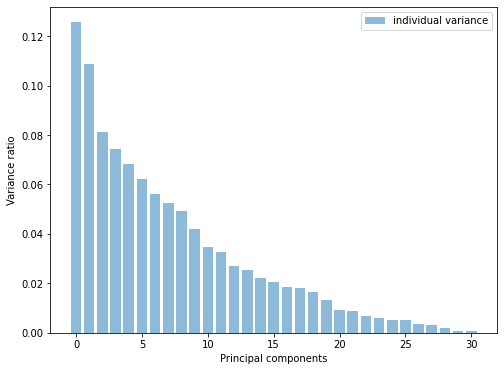

In [ ]:
plt.figure(figsize=(8, 6))
plt.bar(range(31), pca_variance_ratio, alpha=0.5, align='center', label='individual variance')
plt.legend()
plt.ylabel('Variance ratio')
plt.xlabel('Principal components')
plt.show()

[ 12.57  23.43  31.54  38.96  45.78  51.99  57.62  62.86  67.77  71.96
  75.44  78.7   81.4   83.96  86.18  88.24  90.11  91.91  93.55  94.9
  95.81  96.7   97.38  98.    98.53  99.03  99.37  99.68  99.89  99.95
 100.  ]


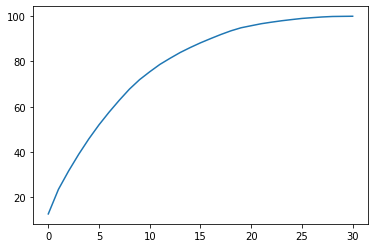

In [ ]:
var = np.cumsum(np.round(pca_variance_ratio, decimals=4)*100)
print(var)
plt.plot(var)

From the results we can see that 98% of the data lies in 24 components 

In [ ]:
for component in range(1,31):
    pca = PCA(n_components=component, random_state=42)
    pca.fit(X_pca_train)
    X_train_pca_trans = pca.transform(X_pca_train)
    X_test_pca_trans = pca.transform(X_pca_test)
    print('Selected Components: ', component)
    run_randomForest(X_train_pca_trans, X_test_pca_trans, ytrain, ytest)
    print()

Selected Components:  1
Actual Data
[1. 0. 0. 0. 1. 0. 1. 1. 1. 1. 0. 0. 1. 0. 1. 1. 0. 1. 0. 1. 1. 0. 1. 0.
 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 1. 1. 1. 1.
 0. 1. 1. 1. 0. 1. 1. 0. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 0. 0. 1.
 0. 0. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 0. 0. 0. 1.
 1. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 0.]

Predicted Data
[0. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 0. 1. 0. 0. 1. 0.
 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 1.
 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1.
 1. 0. 1. 1. 0. 0. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 1.
 0. 0. 1. 0. 0. 0. 0. 1.]
MSE: 
0.4140625
Accuracy:  0.5859375

Selected Components:  2
Actual Data
[1. 0. 0. 0. 1. 0. 1. 1. 1. 1. 0. 0. 1. 0. 1. 1. 0. 1. 0. 1. 1. 0. 1. 0.
 1. 1. 1. 1. 1. 1. 

From the results above we can clearly see that 28 components yield the best accuracy

In [ ]:
pca = PCA(n_components= 28, random_state=42)
pca.fit(X_pca_train)

PCA(copy=True, iterated_power='auto', n_components=28, random_state=42,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
X_train_pca_trans = pca.transform(X_pca_train)
X_test_pca_trans = pca.transform(X_pca_test)
X_train_pca_trans.shape, X_test_pca_trans.shape

((1149, 28), (128, 28))

In [ ]:
# PCA applied
run_randomForest(X_train_pca_trans, X_test_pca_trans, ytrain, ytest)

Actual Data
[1. 0. 0. 0. 1. 0. 1. 1. 1. 1. 0. 0. 1. 0. 1. 1. 0. 1. 0. 1. 1. 0. 1. 0.
 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 1. 1. 1. 1.
 0. 1. 1. 1. 0. 1. 1. 0. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 0. 0. 1.
 0. 0. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 0. 0. 0. 1.
 1. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 0.]

Predicted Data
[0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0.
 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1.
 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 1. 0. 1. 0. 1. 0. 1.
 1. 0. 1. 1. 0. 0. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 1.
 1. 0. 1. 0. 1. 0. 1. 0.]
MSE: 
0.34375
Accuracy Score:  0.65625


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
# Original Data
run_randomForest(xtrain, xtest, ytrain, ytest)

Actual Data
[1. 0. 0. 0. 1. 0. 1. 1. 1. 1. 0. 0. 1. 0. 1. 1. 0. 1. 0. 1. 1. 0. 1. 0.
 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 1. 1. 1. 1.
 0. 1. 1. 1. 0. 1. 1. 0. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 0. 0. 1.
 0. 0. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 0. 0. 0. 1.
 1. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 0.]

Predicted Data
[0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 0. 0. 1. 0.
 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 0. 0. 1. 0. 1. 1. 0.
 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1.
 1. 0. 1. 1. 0. 0. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 1.
 1. 0. 1. 0. 1. 0. 1. 0.]
MSE: 
0.3515625
Accuracy:  0.6484375


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
# pca with adaboost
pca_ada_model = run_adaBoost(X_train_pca_trans, X_test_pca_trans, ytrain, ytest)

Actual Data
[1. 0. 0. 0. 1. 0. 1. 1. 1. 1. 0. 0. 1. 0. 1. 1. 0. 1. 0. 1. 1. 0. 1. 0.
 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 1. 1. 1. 1.
 0. 1. 1. 1. 0. 1. 1. 0. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 0. 0. 1.
 0. 0. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 0. 0. 0. 1.
 1. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 0.]

Predicted Data
[0. 1. 0. 0. 1. 1. 1. 1. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 1.
 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1. 0. 0. 0. 1. 1. 1. 0.
 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 0. 1. 1.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 1. 0. 1. 1. 0. 1. 0. 1. 1. 0.
 1. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 1. 1. 0. 0. 1. 0. 1. 1. 1. 0.
 1. 0. 0. 0. 1. 0. 1. 0.]
MSE: 
0.3671875
Accuracy:  0.6328125


In [ ]:
run_adaBoost(xtrain, xtest, ytrain, ytest)

Actual Data
[1. 0. 0. 0. 1. 0. 1. 1. 1. 1. 0. 0. 1. 0. 1. 1. 0. 1. 0. 1. 1. 0. 1. 0.
 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 1. 1. 1. 1.
 0. 1. 1. 1. 0. 1. 1. 0. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 0. 0. 1.
 0. 0. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 0. 0. 0. 1.
 1. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 0.]

Predicted Data
[1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 0. 1. 0. 0. 0. 1. 1. 0.
 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 0.
 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1.
 1. 0. 0. 1. 0. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 1. 0. 0. 1. 1.
 1. 0. 1. 1. 0. 1. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1.]
MSE: 
0.3125
Accuracy:  0.6875


AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)

## Dimensionality Reduction by LDA

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [ ]:
lda = LDA(n_components=1)
X_train_lda = lda.fit_transform(X_train_uncorr, ytrain)
X_test_lda = lda.transform(X_test_uncorr)

In [ ]:
lda_model = run_randomForest(X_train_lda, X_test_lda, ytrain, ytest)

Actual Data
[1. 0. 0. 0. 1. 0. 1. 1. 1. 1. 0. 0. 1. 0. 1. 1. 0. 1. 0. 1. 1. 0. 1. 0.
 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 1. 1. 1. 1.
 0. 1. 1. 1. 0. 1. 1. 0. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 0. 0. 1.
 0. 0. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 0. 0. 0. 1.
 1. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 0.]

Predicted Data
[0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 0. 1. 0. 0. 1. 0.
 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 1. 0. 0. 1. 1. 1. 0. 1. 0. 1. 1. 0.
 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1.
 0. 1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 0. 0. 1. 0. 1.
 1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1. 1. 0. 0. 0. 0. 1. 1. 0. 1. 1.
 1. 0. 1. 0. 1. 0. 1. 0.]
MSE: 
0.3984375
Accuracy:  0.6015625


In [ ]:
run_randomForest(xtrain, xtest, ytrain, ytest)

Actual Data
[1. 0. 0. 0. 1. 0. 1. 1. 1. 1. 0. 0. 1. 0. 1. 1. 0. 1. 0. 1. 1. 0. 1. 0.
 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 1. 1. 1. 1.
 0. 1. 1. 1. 0. 1. 1. 0. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 0. 0. 1.
 0. 0. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 0. 0. 0. 1.
 1. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 0.]

Predicted Data
[0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 0. 0. 1. 0.
 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 0. 0. 1. 0. 1. 1. 0.
 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1.
 1. 0. 1. 1. 0. 0. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 1.
 1. 0. 1. 0. 1. 0. 1. 0.]
MSE: 
0.3515625
Accuracy:  0.6484375


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
lda_ada = run_adaBoost(X_train_lda, X_test_lda, ytrain, ytest)

Actual Data
[1. 0. 0. 0. 1. 0. 1. 1. 1. 1. 0. 0. 1. 0. 1. 1. 0. 1. 0. 1. 1. 0. 1. 0.
 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 1. 1. 1. 1.
 0. 1. 1. 1. 0. 1. 1. 0. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 0. 0. 1.
 0. 0. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 0. 0. 0. 1.
 1. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 0.]

Predicted Data
[1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 1. 0. 0. 1. 1. 0.
 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1.
 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1.
 1. 0. 0. 0. 1. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 0. 1.
 1. 0. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 0. 1. 0. 1.
 1. 1. 1. 1. 1. 1. 1. 0.]
MSE: 
0.3671875
Accuracy:  0.6328125


In [ ]:
ada = run_adaBoost(xtrain, xtest, ytrain, ytest)

Actual Data
[1. 0. 0. 0. 1. 0. 1. 1. 1. 1. 0. 0. 1. 0. 1. 1. 0. 1. 0. 1. 1. 0. 1. 0.
 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 1. 1. 1. 1.
 0. 1. 1. 1. 0. 1. 1. 0. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 0. 0. 1.
 0. 0. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 0. 0. 0. 1.
 1. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 0.]

Predicted Data
[1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 0. 1. 0. 0. 0. 1. 1. 0.
 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 0.
 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1.
 1. 0. 0. 1. 0. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 1. 0. 0. 1. 1.
 1. 0. 1. 1. 0. 1. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1.]
MSE: 
0.3125
Accuracy:  0.6875


## Dimensionality Reduction by ICA

In [ ]:
from sklearn.decomposition import FastICA 

In [ ]:
for component in range(1,31):
    ICA = FastICA(n_components=component, random_state=12, max_iter= 1000) 
    X_train_ica= ICA.fit_transform(X_train_uncorr)
    X_test_ica = ICA.fit_transform(X_test_uncorr)
    print('Selected Components: ', component)
    run_randomForest(X_train_ica, X_test_ica, ytrain, ytest)
    print()

Selected Components:  1
Actual Data
1059    52
1089    53
1057    31
1162    70
1147    25
1179    75
1172    36
1076    32
1136    54
1063    67
1058    58
1178    52
1125    29
1171    71
1025    63
1046    64
1110    60
1040    35
Name: win_percentage, dtype: int64

Predicted Data
[34 34 20 62 20 71 34 20 70 20 68 48 20 71 71 73 69 30]
MSE: 
220.66666666666666
Accuracy Score:  0.05555555555555555

Selected Components:  2


/usr/local/lib/python3.6/dist-packages/sklearn/decomposition/_fastica.py:119: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)


Actual Data
1059    52
1089    53
1057    31
1162    70
1147    25
1179    75
1172    36
1076    32
1136    54
1063    67
1058    58
1178    52
1125    29
1171    71
1025    63
1046    64
1110    60
1040    35
Name: win_percentage, dtype: int64

Predicted Data
[54 63 20 71 20 74 40 20 40 46 40 51 20 45 45 70 70 20]
MSE: 
156.44444444444446
Accuracy Score:  0.0

Selected Components:  3


/usr/local/lib/python3.6/dist-packages/sklearn/decomposition/_fastica.py:119: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)


Actual Data
1059    52
1089    53
1057    31
1162    70
1147    25
1179    75
1172    36
1076    32
1136    54
1063    67
1058    58
1178    52
1125    29
1171    71
1025    63
1046    64
1110    60
1040    35
Name: win_percentage, dtype: int64

Predicted Data
[42 15 67 20 45 20 45 74 70 23 60 45 73 20 69 20 20 68]
MSE: 
1225.1666666666667
Accuracy Score:  0.0

Selected Components:  4
Actual Data
1059    52
1089    53
1057    31
1162    70
1147    25
1179    75
1172    36
1076    32
1136    54
1063    67
1058    58
1178    52
1125    29
1171    71
1025    63
1046    64
1110    60
1040    35
Name: win_percentage, dtype: int64

Predicted Data
[68 40 60 20 60 41 45 70 23 51 41 43 60 41 46 20 48 70]
MSE: 
817.4444444444445
Accuracy Score:  0.0



/usr/local/lib/python3.6/dist-packages/sklearn/decomposition/_fastica.py:119: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)


Selected Components:  5
Actual Data
1059    52
1089    53
1057    31
1162    70
1147    25
1179    75
1172    36
1076    32
1136    54
1063    67
1058    58
1178    52
1125    29
1171    71
1025    63
1046    64
1110    60
1040    35
Name: win_percentage, dtype: int64

Predicted Data
[53 63 74 70 54 34 60 43 20 60 20 74 20 34 20 34 18 41]
MSE: 
794.5
Accuracy Score:  0.05555555555555555

Selected Components:  6
Actual Data
1059    52
1089    53
1057    31
1162    70
1147    25
1179    75
1172    36
1076    32
1136    54
1063    67
1058    58
1178    52
1125    29
1171    71
1025    63
1046    64
1110    60
1040    35
Name: win_percentage, dtype: int64

Predicted Data
[53 60 53 70 51 45 68 51 20 68 34 48 54 34 20 53 60 43]
MSE: 
515.1111111111111
Accuracy Score:  0.1111111111111111



/usr/local/lib/python3.6/dist-packages/sklearn/decomposition/_fastica.py:119: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)


Selected Components:  7
Actual Data
1059    52
1089    53
1057    31
1162    70
1147    25
1179    75
1172    36
1076    32
1136    54
1063    67
1058    58
1178    52
1125    29
1171    71
1025    63
1046    64
1110    60
1040    35
Name: win_percentage, dtype: int64

Predicted Data
[23 65 68 39 60 45 60 51 45 42 60 41 57 60 20 20 60 51]
MSE: 
675.2222222222222
Accuracy Score:  0.05555555555555555



/usr/local/lib/python3.6/dist-packages/sklearn/decomposition/_fastica.py:119: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)


Selected Components:  8
Actual Data
1059    52
1089    53
1057    31
1162    70
1147    25
1179    75
1172    36
1076    32
1136    54
1063    67
1058    58
1178    52
1125    29
1171    71
1025    63
1046    64
1110    60
1040    35
Name: win_percentage, dtype: int64

Predicted Data
[20 70 52 74 45 68 59 39 36 53 34 31 63 60 43 34 59 58]
MSE: 
413.3888888888889
Accuracy Score:  0.0



/usr/local/lib/python3.6/dist-packages/sklearn/decomposition/_fastica.py:119: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)


Selected Components:  9
Actual Data
1059    52
1089    53
1057    31
1162    70
1147    25
1179    75
1172    36
1076    32
1136    54
1063    67
1058    58
1178    52
1125    29
1171    71
1025    63
1046    64
1110    60
1040    35
Name: win_percentage, dtype: int64

Predicted Data
[59 36 20 51 68 50 57 65 30 45 57 40 59 60 51 71 45 51]
MSE: 
429.1111111111111
Accuracy Score:  0.0

Selected Components:  10
Actual Data
1059    52
1089    53
1057    31
1162    70
1147    25
1179    75
1172    36
1076    32
1136    54
1063    67
1058    58
1178    52
1125    29
1171    71
1025    63
1046    64
1110    60
1040    35
Name: win_percentage, dtype: int64

Predicted Data
[60 60 60 45 51 45 60 32 51 40 60 43 41 21 20 60 51 70]
MSE: 
576.0555555555555
Accuracy Score:  0.05555555555555555



/usr/local/lib/python3.6/dist-packages/sklearn/decomposition/_fastica.py:119: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)


Selected Components:  11
Actual Data
1059    52
1089    53
1057    31
1162    70
1147    25
1179    75
1172    36
1076    32
1136    54
1063    67
1058    58
1178    52
1125    29
1171    71
1025    63
1046    64
1110    60
1040    35
Name: win_percentage, dtype: int64

Predicted Data
[45 54 60 42 60 64 18 60 50 51 20 40 53 53 53 20 54 30]
MSE: 
499.22222222222223
Accuracy Score:  0.0



/usr/local/lib/python3.6/dist-packages/sklearn/decomposition/_fastica.py:119: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)


Selected Components:  12
Actual Data
1059    52
1089    53
1057    31
1162    70
1147    25
1179    75
1172    36
1076    32
1136    54
1063    67
1058    58
1178    52
1125    29
1171    71
1025    63
1046    64
1110    60
1040    35
Name: win_percentage, dtype: int64

Predicted Data
[60 62 64 32 30 63 51 20 59 51 60 50 40 60 63 67 71 57]
MSE: 
242.27777777777777
Accuracy Score:  0.05555555555555555



/usr/local/lib/python3.6/dist-packages/sklearn/decomposition/_fastica.py:119: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)


Selected Components:  13
Actual Data
1059    52
1089    53
1057    31
1162    70
1147    25
1179    75
1172    36
1076    32
1136    54
1063    67
1058    58
1178    52
1125    29
1171    71
1025    63
1046    64
1110    60
1040    35
Name: win_percentage, dtype: int64

Predicted Data
[20 60 60 45 73 50 50 52 51 34 51 53 51 48 60 30 51 51]
MSE: 
540.3888888888889
Accuracy Score:  0.0



/usr/local/lib/python3.6/dist-packages/sklearn/decomposition/_fastica.py:119: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)


Selected Components:  14
Actual Data
1059    52
1089    53
1057    31
1162    70
1147    25
1179    75
1172    36
1076    32
1136    54
1063    67
1058    58
1178    52
1125    29
1171    71
1025    63
1046    64
1110    60
1040    35
Name: win_percentage, dtype: int64

Predicted Data
[70 60 50 45 70 50 42 50 50 51 50 59 50 57 20 63 54 68]
MSE: 
464.77777777777777
Accuracy Score:  0.0



/usr/local/lib/python3.6/dist-packages/sklearn/decomposition/_fastica.py:119: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)


Selected Components:  15
Actual Data
1059    52
1089    53
1057    31
1162    70
1147    25
1179    75
1172    36
1076    32
1136    54
1063    67
1058    58
1178    52
1125    29
1171    71
1025    63
1046    64
1110    60
1040    35
Name: win_percentage, dtype: int64

Predicted Data
[70 70 54 51 60 51 59 70 59 65 58 26 63 23 50 53 51 34]
MSE: 
545.2222222222222
Accuracy Score:  0.05555555555555555



/usr/local/lib/python3.6/dist-packages/sklearn/decomposition/_fastica.py:119: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)


Selected Components:  16
Actual Data
1059    52
1089    53
1057    31
1162    70
1147    25
1179    75
1172    36
1076    32
1136    54
1063    67
1058    58
1178    52
1125    29
1171    71
1025    63
1046    64
1110    60
1040    35
Name: win_percentage, dtype: int64

Predicted Data
[68 54 34 51 54 42 59 60 60 50 70 56 51 59 68 60 68 62]
MSE: 
323.1666666666667
Accuracy Score:  0.0



/usr/local/lib/python3.6/dist-packages/sklearn/decomposition/_fastica.py:119: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)


Selected Components:  17
Actual Data
1059    52
1089    53
1057    31
1162    70
1147    25
1179    75
1172    36
1076    32
1136    54
1063    67
1058    58
1178    52
1125    29
1171    71
1025    63
1046    64
1110    60
1040    35
Name: win_percentage, dtype: int64

Predicted Data
[51 51 51 51 34 51 65 69 51 43 37 60 65 51 53 51 53 57]
MSE: 
401.1666666666667
Accuracy Score:  0.0



/usr/local/lib/python3.6/dist-packages/sklearn/decomposition/_fastica.py:119: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)


Selected Components:  18
Actual Data
1059    52
1089    53
1057    31
1162    70
1147    25
1179    75
1172    36
1076    32
1136    54
1063    67
1058    58
1178    52
1125    29
1171    71
1025    63
1046    64
1110    60
1040    35
Name: win_percentage, dtype: int64

Predicted Data
[68 51 51 63 59 68 60 59 51 71 68 60 59 60 60 54 30 50]
MSE: 
314.6111111111111
Accuracy Score:  0.0



/usr/local/lib/python3.6/dist-packages/sklearn/decomposition/_fastica.py:469: UserWarning: n_components is too large: it will be set to 18
  % n_components
/usr/local/lib/python3.6/dist-packages/sklearn/decomposition/_fastica.py:119: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)


Selected Components:  19


ValueError: ignored

As we can see from the results above, 6 components yields the best accuracy

In [ ]:
ICA = FastICA(n_components=6, random_state=12,  max_iter= 10000) 
X_train_ica= ICA.fit_transform(X_train_uncorr)
X_test_ica = ICA.fit_transform(X_test_uncorr)

/usr/local/lib/python3.6/dist-packages/sklearn/decomposition/_fastica.py:119: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)


In [ ]:
ica_rf = run_randomForest(X_train_ica, X_test_ica, ytrain, ytest)

Actual Data
[1. 0. 0. 0. 1. 0. 1. 1. 1. 1. 0. 0. 1. 0. 1. 1. 0. 1. 0. 1. 1. 0. 1. 0.
 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 1. 1. 1. 1.
 0. 1. 1. 1. 0. 1. 1. 0. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 0. 0. 1.
 0. 0. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 0. 0. 0. 1.
 1. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 0.]

Predicted Data
[1. 1. 1. 0. 1. 1. 0. 0. 1. 1. 0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 0. 0. 1. 0.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1.
 1. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1. 1. 1. 1.
 1. 1. 0. 0. 1. 1. 0. 1. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1.
 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 0. 1. 1. 0.]
MSE: 
0.3515625
Accuracy:  0.6484375


In [ ]:
ica_rf = run_adaBoost(X_train_ica, X_test_ica, ytrain, ytest)

Actual Data
[1. 0. 0. 0. 1. 0. 1. 1. 1. 1. 0. 0. 1. 0. 1. 1. 0. 1. 0. 1. 1. 0. 1. 0.
 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 1. 1. 1. 1.
 0. 1. 1. 1. 0. 1. 1. 0. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 0. 0. 1.
 0. 0. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 0. 0. 0. 1.
 1. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 0.]

Predicted Data
[1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1.]
MSE: 
0.390625
Accuracy Score:  0.609375
